<a href="https://colab.research.google.com/github/Meralbalik/Ind.-Work-/blob/master/MNIST_CNN_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Data CNN using Keras

In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# datasize
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


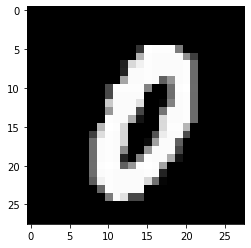

In [0]:
# there are 60000 images in train set and 10000 in test set. Each of the images are in size of 28*28.

image_index = 34 # select any index of image up to 60000
plt.imshow(x_train[image_index], cmap='gray')
plt.show()

In [0]:
# reshaping the images so that it can work with Keras API (number_of_images, rows, columns, dimension)
# dimension is 1 if image is gray scale, 3 for RGB images

x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [0]:
# data scaling and normalization (done to make algortihm to run faster)
# making sure the values are float so that we can get decimal points after division

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
# normalizing RGB codes by dividing it to the max RGB value
# subtracting 0.5 so that they will be uniformly distributed around zero.

x_train /= 255 - 0.5
x_test /= 255 - 0.5

In [0]:
# creating a Sequential model for CNN in Keras

num_filters = 8   # number of CNN layers
filter_size1 = 3
pool_size1 = 2

model = Sequential()
model.add(Conv2D(num_filters, filter_size1, strides=(1,1), input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size = pool_size1))
model.add(Flatten())
model.add(Dense(10, activation = 'softmax'))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 8)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1352)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                13530     
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
_________________________________________________________________


In [0]:
# compile the model

model.compile('adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# train the model
# to_categorical function is used for one hot encoding

model.fit(x_train, to_categorical(y_train), epochs=3, verbose=1, validation_data=(x_test, to_categorical(y_test),))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 17s 278us/step - loss: 0.3582 - accuracy: 0.8994 - val_loss: 0.2396 - val_accuracy: 0.9336
Epoch 2/3
60000/60000 [==============================] - 17s 288us/step - loss: 0.2087 - accuracy: 0.9411 - val_loss: 0.1712 - val_accuracy: 0.9534
Epoch 3/3
60000/60000 [==============================] - 17s 280us/step - loss: 0.1521 - accuracy: 0.9570 - val_loss: 0.1348 - val_accuracy: 0.9622


In [0]:
#score = model.evaluate(x_test, y_test)
#print('Test Loss: ', score[0])
#print('Test Accuracy: ', score[1])

In [0]:
# predict on the first 5 images

predictions = model.predict(x_test[:5])
print(predictions)

# print our model's predictions
print(np.argmax(predictions, axis=1)) #[7,2,1,0,4]

# check our predictions against the ground truths
print(y_test[:5]) #[7,2,1,0,4]

[[1.91520326e-06 1.53574806e-08 1.25553061e-05 2.02295347e-03
  8.22060429e-07 3.33611679e-05 7.73860309e-10 9.97823954e-01
  1.11355951e-06 1.03184932e-04]
 [3.39118211e-04 4.89220474e-06 9.97639179e-01 1.47268365e-04
  1.08702325e-10 2.09789563e-04 1.33271993e-03 3.21531565e-13
  3.27151327e-04 3.78111853e-09]
 [2.11471361e-05 9.95043278e-01 2.20512203e-03 1.15192583e-04
  5.29466546e-04 9.44635758e-05 1.50084641e-04 1.64817879e-03
  1.68306738e-04 2.48372271e-05]
 [9.94771302e-01 3.64047963e-07 1.98981096e-03 6.62632374e-06
  1.33313470e-05 2.60609691e-03 1.28756408e-04 3.33196280e-04
  8.48003547e-05 6.58348799e-05]
 [1.70790619e-04 3.47537389e-06 1.91261817e-04 1.47890496e-05
  9.97058868e-01 1.13042497e-05 1.10788475e-04 2.94928963e-04
  3.44471773e-05 2.10935576e-03]]
[7 2 1 0 4]
[7 2 1 0 4]
